### Recommendations with MovieTweetings: Getting to Know The Data

Throughout this lesson, you will be working with the [MovieTweetings Data](https://github.com/sidooms/MovieTweetings/tree/master/recsyschallenge2014).  To get started, you can read more about this project and the dataset from the [publication here](http://crowdrec2013.noahlab.com.hk/papers/crowdrec2013_Dooms.pdf).

**Note:** There are solutions to each of the notebooks available by hitting the orange jupyter logo in the top left of this notebook.  Additionally, you can watch me work through the solutions on the screencasts that follow each workbook. 

To get started, read in the libraries and the two datasets you will be using throughout the lesson using the code below.

 

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tests as t
import re
%matplotlib inline

# Read in the datasets
movies = pd.read_csv('https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat', delimiter='::', header=None, names=['movie_id', 'movie', 'genre'], dtype={'movie_id': object}, engine='python')
reviews = pd.read_csv('https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat', delimiter='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], dtype={'movie_id': object, 'user_id': object, 'timestamp': object}, engine='python')

#### 1. Take a Look At The Data 

Take a look at the data and use your findings to fill in the dictionary below with the correct responses to show your understanding of the data.

In [174]:
movies.head()

,movie_id,movie,genre
0,0000008,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,0000010,La sortie des usines Lumière (1895),Documentary|Short
2,0000012,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,0000091,Le manoir du diable (1896),Short|Horror


In [175]:
reviews.head()

,user_id,movie_id,rating,timestamp
0,1,0114508,8,1381006850
1,2,0358273,9,1579057827
2,2,10039344,5,1578603053
3,2,6751668,9,1578955697
4,2,7131622,8,1579559244


In [176]:
# cell for work
movies.movie_id.nunique()

35060

In [177]:
# cell for work
reviews.rating.count()

848589

In [178]:
# genres in the data
movies.genre.nunique()

2712

In [179]:
movies.genre.head()

0    Documentary|Short
1    Documentary|Short
2    Documentary|Short
3                  NaN
4         Short|Horror
Name: genre, dtype: object

In [180]:
# source: https://stackoverflow.com/questions/43223671/take-count-of-values-from-a-dataframe-which-are-separated-by-a-comma
genres = pd.DataFrame(movies.genre.str.split('|', expand=True).stack(), columns= ['genre'])  
genres = genres.reset_index(drop = True)  
genre_count = pd.DataFrame(genres.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count = genre_count.reset_index()
genre_count.genre.nunique()

28

In [181]:
# number of unique users
reviews.user_id.nunique()

65656

In [182]:
# number of missing ratings
reviews.rating.value_counts()

8     204573
7     190030
9     120173
6     110779
10    100131
5      63719
4      26199
3      14307
1       9921
2       8502
0        255
Name: rating, dtype: int64

In [183]:
# and still more

In [184]:
# minimum raitng
reviews.rating.min()

0

In [185]:
# maximum rating
reviews.rating.max()

10

In [186]:
# average rating
reviews.rating.mean()

7.3151690629975175

In [187]:
# and even more - open additional cells as necessary

In [188]:
# missing
reviews.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [189]:
movies.isna().sum()

movie_id      0
movie         0
genre       260
dtype: int64

In [190]:
# Use your findings to match each variable to the correct statement in the dictionary


dict_sol1 = {
'The number of movies in the dataset': 35046,
'The number of ratings in the dataset':848234,
'The number of different genres':28,
'The number of unique users in the dataset':65614,
'The number missing ratings in the reviews dataset':0,
'The average rating given across all ratings':7.3151005500840567,
'The minimum rating given across all ratings':0,
'The maximum rating given across all ratings':10
}

# Originally, I had this to check your solution, but the 
# links are live and updating.  That didn't end up being
# a great idea


#### 2. Data Cleaning

Next, we need to pull some additional relevant information out of the existing columns. 

For each of the datasets, there are a couple of cleaning steps we need to take care of:

#### Movies
* Pull the date from the title and create new column
* Dummy the date column with 1's and 0's for each century of a movie (1800's, 1900's, and 2000's)
* Dummy column the genre with 1's and 0's

#### Reviews
* Create a date out of time stamp

You can check your results against the header of my solution by running the cell below with the **show_clean_dataframes** function.

In [191]:
def extract_year(title):
    '''
    input: title string
    output: year integer
    '''
    title = re.findall(r'\((.*?)\)', title)
    title = int(title[0])
    return title

In [192]:
movies['date'] = movies.movie.apply(extract_year)

Text(0.5,1,'Distribution of Date')

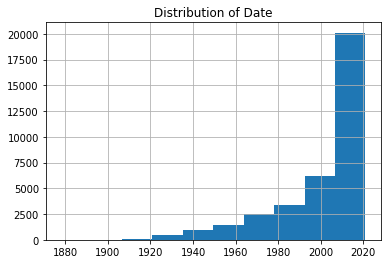

In [193]:
movies['date'].hist()
plt.title("Distribution of Date")

In [194]:
movies.head()

,movie_id,movie,genre,date
0,0000008,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,1894
1,0000010,La sortie des usines Lumière (1895),Documentary|Short,1895
2,0000012,The Arrival of a Train (1896),Documentary|Short,1896
3,25,The Oxford and Cambridge University Boat Race ...,NaN,1895
4,0000091,Le manoir du diable (1896),Short|Horror,1896


In [195]:
# Dummy the date column with 1's and 0's for each century of a movie (1800's, 1900's, and 2000's)

In [196]:
def convert_date(date):
    '''
    input:
    date string
    output:
    string of the century the date falls
    '''
    if date >= 1800 and date < 1900:
        return "1800's"
    elif date >= 1900 and date < 2000:
        return "1900's"
    else:
        return "200's"

In [197]:
movies['date'] = movies['date'].apply(convert_date)

In [198]:
dummie_dates = pd.get_dummies(movies['date'] )
movies = movies.join(dummie_dates)

In [199]:
movies.head()

,movie_id,movie,genre,date,1800's,1900's,200's
0,0000008,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,1800's,1,0,0
1,0000010,La sortie des usines Lumière (1895),Documentary|Short,1800's,1,0,0
2,0000012,The Arrival of a Train (1896),Documentary|Short,1800's,1,0,0
3,25,The Oxford and Cambridge University Boat Race ...,NaN,1800's,1,0,0
4,0000091,Le manoir du diable (1896),Short|Horror,1800's,1,0,0


In [200]:
# cell for work

In [201]:
# Dummy column the genre with 1's and 0's
genres = movies.genre.str.get_dummies()
movies = movies.join(genres)
movies.head()

,movie_id,movie,genre,date,1800's,1900's,200's,Action,Adult,Adventure,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0000008,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,1800's,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0000010,La sortie des usines Lumière (1895),Documentary|Short,1800's,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0000012,The Arrival of a Train (1896),Documentary|Short,1800's,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,25,The Oxford and Cambridge University Boat Race ...,NaN,1800's,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000091,Le manoir du diable (1896),Short|Horror,1800's,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [202]:
reviews.head()

,user_id,movie_id,rating,timestamp
0,1,0114508,8,1381006850
1,2,0358273,9,1579057827
2,2,10039344,5,1578603053
3,2,6751668,9,1578955697
4,2,7131622,8,1579559244


In [203]:
# convert to date 
reviews['date'] = pd.to_datetime(reviews['timestamp'],unit='s')

In [204]:
# get dummy variable for month and year
year = pd.get_dummies(reviews.date.dt.year,prefix='year')
month = pd.get_dummies(reviews.date.dt.month,prefix='month')

In [205]:
# join the month and year
reviews = reviews.join(month)
reviews = reviews.join(year)

In [206]:
movies.head()

,movie_id,movie,genre,date,1800's,1900's,200's,Action,Adult,Adventure,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0000008,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,1800's,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0000010,La sortie des usines Lumière (1895),Documentary|Short,1800's,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0000012,The Arrival of a Train (1896),Documentary|Short,1800's,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,25,The Oxford and Cambridge University Boat Race ...,NaN,1800's,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000091,Le manoir du diable (1896),Short|Horror,1800's,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [207]:
reviews.head()

,user_id,movie_id,rating,timestamp,date,month_1,month_2,month_3,month_4,month_5,...,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,1,0114508,8,1381006850,2013-10-05 21:00:50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0358273,9,1579057827,2020-01-15 03:10:27,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,10039344,5,1578603053,2020-01-09 20:50:53,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,6751668,9,1578955697,2020-01-13 22:48:17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,7131622,8,1579559244,2020-01-20 22:27:24,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [208]:
reviews_new, movies_new = t.show_clean_dataframes()

   Unnamed: 0  user_id  movie_id  rating   timestamp                 date  \
0           0        1     68646      10  1381620027  2013-10-12 23:20:27   
1           1        1    113277      10  1379466669  2013-09-18 01:11:09   
2           2        2    422720       8  1412178746  2014-10-01 15:52:26   
3           3        2    454876       8  1394818630  2014-03-14 17:37:10   
4           4        2    790636       7  1389963947  2014-01-17 13:05:47   

   month_1  month_2  month_3  month_4    ...      month_9  month_10  month_11  \
0        0        0        0        0    ...            0         1         0   
1        0        0        0        0    ...            0         0         0   
2        0        0        0        0    ...            0         1         0   
3        0        0        0        0    ...            0         0         0   
4        0        0        0        0    ...            0         0         0   

   month_12  year_2013  year_2014  year_2015  year